<a href="https://colab.research.google.com/github/jessicajamesegwom/jessicajamesegwom/blob/main/breastcancerLDAsvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](files/image.335.png)

In [720]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import the Libraries to be used

In [721]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Feature extraction
import itertools
from sklearn.model_selection import (cross_val_score, GridSearchCV,
                                    StratifiedKFold, ShuffleSplit )# grid search to improve the estimator

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
%matplotlib inline


# Import Breast cancer dataset using panda 

In [722]:
data= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Linear DIscriminant and support vector/breast_data.csv')
data.columns = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
               'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

#data= data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head(30)

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


# Describe the data using statistical measures 

In [723]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


 # Declare the rows and columns by numbers

In [724]:
X = data.iloc[:, 1:].values
Y = data['Class'].values

In [725]:
X.shape

(699, 9)

In [726]:
Y.shape

(699,)

# Decoding and coverting the missing values  

In [727]:
data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


# printing the value before the replacement of the missing values and after the replacement of the missing values using median

In [728]:
#data = data.replace('?',np.NaN)
#mean = data.filter(['Bare Nuclei']).mean()
#data[['Bare Nuclei']]= data[['Bare Nuclei']].replace('?').fillna(mean)
#print(data)
cellname = data['Bare Nuclei']
print('Before replacing missing values:')
print(cellname)
median= cellname.median()
cellname.fillna(median, inplace=True)
print('\nAfter replacing missing values:')
print(cellname)
data.head(30)

Before replacing missing values:
0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

After replacing missing values:
0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


# Replacing the 2 for benign class with 0 and 4 for malignant class with 1 

In [729]:
data.iloc[:,9].replace(2, 0,inplace=True)
data.iloc[:,9].replace(4, 1,inplace=True)
print(data)
data.head(30)

     Clump Thickness  Uniformity of Cell Size  ...  Mitoses  Class
0                  5                        1  ...        1      0
1                  5                        4  ...        1      0
2                  3                        1  ...        1      0
3                  6                        8  ...        1      0
4                  4                        1  ...        1      0
..               ...                      ...  ...      ...    ...
694                3                        1  ...        1      0
695                2                        1  ...        1      0
696                5                       10  ...        2      1
697                4                        8  ...        1      1
698                4                        8  ...        1      1

[699 rows x 10 columns]


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


# Converting data to float

In [730]:
df = data.astype(float)
print(df)

     Clump Thickness  Uniformity of Cell Size  ...  Mitoses  Class
0                5.0                      1.0  ...      1.0    0.0
1                5.0                      4.0  ...      1.0    0.0
2                3.0                      1.0  ...      1.0    0.0
3                6.0                      8.0  ...      1.0    0.0
4                4.0                      1.0  ...      1.0    0.0
..               ...                      ...  ...      ...    ...
694              3.0                      1.0  ...      1.0    0.0
695              2.0                      1.0  ...      1.0    0.0
696              5.0                     10.0  ...      2.0    1.0
697              4.0                      8.0  ...      1.0    1.0
698              4.0                      8.0  ...      1.0    1.0

[699 rows x 10 columns]


# Normalization of data to put the data in 0 and 1 range 

In [731]:
names = data.columns[0:10]
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df.iloc[:,0:10]) 
scaled_df = pd.DataFrame(scaled_df, columns=names)
print (scaled_df)

     Clump Thickness  Uniformity of Cell Size  ...   Mitoses  Class
0           0.444444                 0.000000  ...  0.000000    0.0
1           0.444444                 0.333333  ...  0.000000    0.0
2           0.222222                 0.000000  ...  0.000000    0.0
3           0.555556                 0.777778  ...  0.000000    0.0
4           0.333333                 0.000000  ...  0.000000    0.0
..               ...                      ...  ...       ...    ...
694         0.222222                 0.000000  ...  0.000000    0.0
695         0.111111                 0.000000  ...  0.000000    0.0
696         0.444444                 1.000000  ...  0.111111    1.0
697         0.333333                 0.777778  ...  0.000000    1.0
698         0.333333                 0.777778  ...  0.000000    1.0

[699 rows x 10 columns]


# Check the correletion between the features

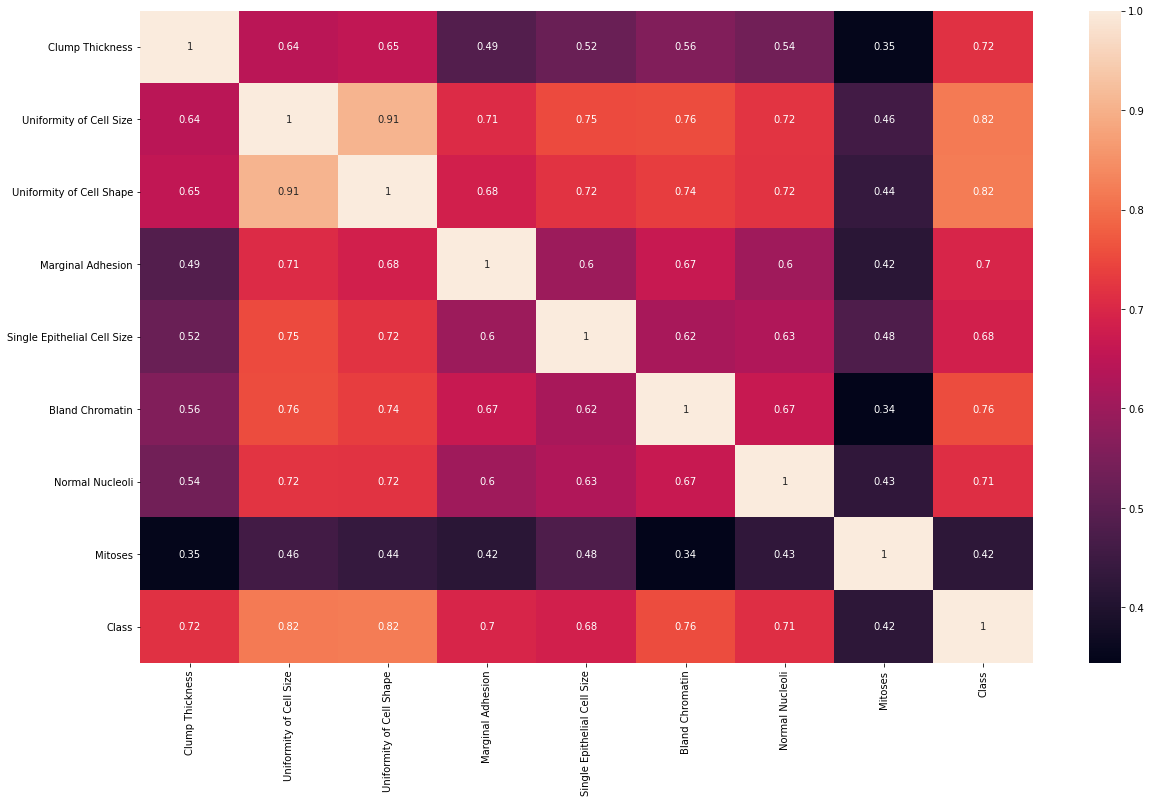

In [732]:
#data= data.drop(['class'],axis=1)
plt.figure(figsize=(20,12)) 
sns.heatmap(data.corr(), annot=True) 

# How many benign and malignant to we have in the dataset

In [733]:
data['Class'].value_counts()

0    458
1    241
Name: Class, dtype: int64

# Let visualize our count 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


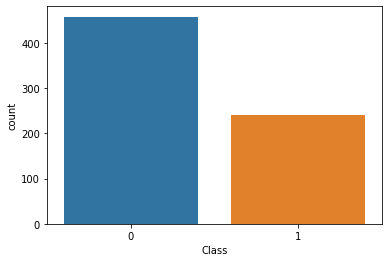

In [734]:
sns.countplot(data['Class'], label = "Count") 

# Creating the target and predictor matrix

In [735]:
#x is the predictors
#y is the target
X= data.drop(['Class'], axis=1 )
X.head(100)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
95,1,1,1,1,2,1,3,1,1
96,2,1,1,2,2,1,1,1,1
97,5,1,1,1,2,1,3,1,1
98,9,6,9,2,10,6,2,9,10


In [736]:
#y matric for the target class
y=data['Class']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

# Standardizing the features 

In [737]:
#from sklearn.preprocessing import StandardScaler
features = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
               'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses']
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Class']].values
# Standardizing the features
X = StandardScaler().fit_transform(X)
y=y.ravel()

In [738]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =20)

# Using LDA for dimensionality reduction 

In [739]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold
lda = LDA(n_components=1)
lda.fit(X=X_train,y=y_train)
lda.predict(X_train)
lda.predict(X_test)
lda.score(X=X_train,y=y_train)
lda.score(X=X_test,y=y_test)

reduced_data = lda.fit_transform(X,y)

principalDf = pd.DataFrame(data = reduced_data, columns = ['PC-1'])
# Adding lables
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

In [740]:
finalDf.to_csv('breast_after_LDA.csv')

In [741]:
lda.explained_variance_ratio_

array([1.])

# Let's split our data using kfold for training and testing

In [742]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=None,shuffle=True)
for train_index,test_index in kf.split(reduced_data):
    print("Train",train_index,"validation:",test_index)
    X_train,X_test=X[train_index,:],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    X_train,X_test,y_train,y_test=X[train_index],X[test_index],y[train_index],y[test_index]
    scores = cross_val_score(lda, X_train, y_train, cv=kf, scoring='accuracy')

print('\nAccuracy: {:.3f}% ({:.3f}%)'.format(scores.mean()*100, scores.std()*100))



Train [  0   1   2   3   4   5   6   7   9  10  11  12  13  14  15  16  17  18
  19  21  22  23  24  26  29  32  33  34  35  37  38  40  43  44  45  46
  47  48  51  52  53  54  55  56  57  58  59  60  61  62  63  65  66  67
  68  69  72  73  74  75  76  78  79  80  81  84  85  86  87  89  90  91
  92  93  94  95  96  97  98  99 100 102 103 104 105 106 107 108 109 110
 111 113 115 116 117 118 120 121 122 123 124 127 128 129 130 131 133 134
 135 136 137 138 139 140 141 142 143 144 146 148 149 150 153 154 155 156
 159 160 161 162 163 164 165 167 168 170 171 173 175 176 177 178 180 181
 182 184 185 187 189 190 192 193 195 196 197 198 199 200 203 204 205 206
 207 209 212 213 214 215 216 217 218 219 220 222 223 225 226 227 228 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 247 248 249 250
 252 253 254 255 256 259 260 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 286 287 288 289 290 291 292
 293 294 295 296 297 298 299 300 301 304 305 

# making predictions using SVM 

In [743]:
svc_model = SVC()

In [744]:
#create a dictionary of all the values we want to test for n_estimator
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 
#using gridsearch to test all values for n_estimators
grid = GridSearchCV(svc_model,param_grid,refit=True,verbose=4)
#fit the modei to the training data
grid.fit(X_train, y_train)

svc_model.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.893, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.902, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.911, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.973, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.964, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.946, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.973, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.964, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.911, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.929, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.973, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.982, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.973, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [745]:
y_predict = svc_model.predict(X_test)
y_predict

array([0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0.])

# Evaluating the prediction model

In [746]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix

In [747]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,50,1
is_healthy,0,88


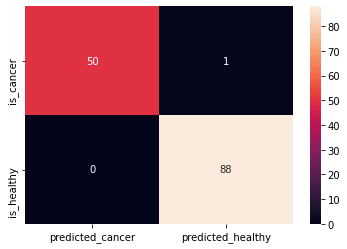

In [748]:
sns.heatmap(confusion, annot=True)

# The classification Report

In [749]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('accuracy %s' %metrics.accuracy_score(y_predict,y_test))
target_names = ['Benign [Class 0]', 'Malignant[Class 1]']
print(classification_report(y_test, y_predict,target_names=target_names))

accuracy 0.9928057553956835
                    precision    recall  f1-score   support

  Benign [Class 0]       0.99      1.00      0.99        88
Malignant[Class 1]       1.00      0.98      0.99        51

          accuracy                           0.99       139
         macro avg       0.99      0.99      0.99       139
      weighted avg       0.99      0.99      0.99       139



In [750]:
from sklearn.metrics import roc_curve, auc

In [751]:
train_fpr, train_tpr = roc_curve(X_train, y_train)
test_fpr, test_tpr, te_thresholds = roc_curve(X_test, y_predict)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

ValueError: ignored